In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
filename = 'Projectcs/dataset/20131201.txt'
delimiter= '\t'

In [3]:
df = pd.read_csv(filename, delimiter=delimiter)
df.head()

,1,1385852400000,39,0.11098916961424417,0.16621436886121638,0.10920185950874473,0.16442705875571695,13.648437920592805
0,1,1385852400000,46,NaN,NaN,NaN,NaN,0.026137
1,1,1385853000000,39,0.165137,0.176399,0.030875,0.027300,13.330858
2,1,1385853600000,0,0.029088,0.027300,NaN,NaN,NaN
3,1,1385853600000,39,0.186451,0.136588,0.054601,NaN,11.329552
4,1,1385854200000,39,0.219652,0.381129,0.082526,0.135964,13.166163


In [4]:
#Define columns
column_names = ['Square_id',
               'Time_interval',
               'Country_code',
               'SMS_in',
               'SMS_out',
               'Call_in',
               'Call_out',
               'Internet_traffic']

df.columns = column_names
df.head()

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
0,1,1385852400000,46,NaN,NaN,NaN,NaN,0.026137
1,1,1385853000000,39,0.165137,0.176399,0.030875,0.027300,13.330858
2,1,1385853600000,0,0.029088,0.027300,NaN,NaN,NaN
3,1,1385853600000,39,0.186451,0.136588,0.054601,NaN,11.329552
4,1,1385854200000,39,0.219652,0.381129,0.082526,0.135964,13.166163


In [5]:
#Check for missing values
missing_time_intervals = df['Time_interval'].isna().sum()

print(f"Number of missing Time_interval values:{missing_time_intervals}")


Number of missing Time_interval values:0


In [6]:
#Check for zero values
zero_time_intervals = (df['Time_interval']==0).sum()

#if there is any 
if zero_time_intervals > 0:
    print(f"There are {zero_time_intervals} zero values.")
else:
    print("There are no zero values")

There are no zero values


In [7]:
print(df.describe())

          Square_id  Time_interval  Country_code        SMS_in       SMS_out  \
count  4.438330e+06   4.438330e+06  4.438330e+06  2.631500e+06  1.533935e+06   
mean   5.161353e+03   1.385901e+12  1.972649e+02  1.684572e+00  1.737836e+00   
std    2.753360e+03   2.238041e+07  3.210737e+03  3.884038e+00  4.393522e+00   
min    1.000000e+00   1.385852e+12  0.000000e+00  2.331498e-06  2.331498e-06   
25%    2.977000e+03   1.385885e+12  1.000000e+00  1.433891e-01  1.454195e-01   
50%    5.259000e+03   1.385903e+12  3.900000e+01  5.196422e-01  5.030412e-01   
75%    7.421000e+03   1.385919e+12  4.400000e+01  1.629083e+00  1.581608e+00   
max    1.000000e+04   1.385938e+12  9.725900e+04  2.773546e+02  2.049408e+02   

            Call_in      Call_out  Internet_traffic  
count  1.420723e+06  2.083289e+06      2.198449e+06  
mean   1.714071e+00  1.415853e+00      3.658177e+01  
std    3.914805e+00  3.826234e+00      8.770331e+01  
min    2.331498e-06  2.331498e-06      2.331498e-06  
25%    1.

In [8]:
#Values missing per column in percetages
features = ['SMS_in',
            'SMS_out',
            'Call_in',
            'Call_out',
            'Internet_traffic']

total_rows = len(df)

missing_counts = {}
missing_percentages = {}

for feature in features:
    missing_count = df[feature].isna().sum()
    missing_percentage = (missing_count /total_rows) * 100
    missing_percentages[feature] = missing_percentage
    missing_counts[feature] = missing_count
    
print(f"Total raws:{total_rows}")
for feature, percentage in missing_percentages.items():
    print(f"{feature} missing rows:{missing_counts[feature]} missing percentage:{percentage:.2f}%  ")
    

Total raws:4438330
SMS_in missing rows:1806830 missing percentage:40.71%  
SMS_out missing rows:2904395 missing percentage:65.44%  
Call_in missing rows:3017607 missing percentage:67.99%  
Call_out missing rows:2355041 missing percentage:53.06%  
Internet_traffic missing rows:2239881 missing percentage:50.47%  


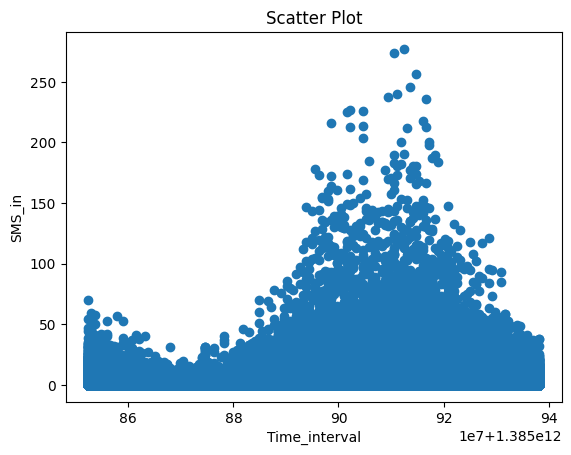

In [9]:
#Plot data distrubution 
plt.scatter(df['Time_interval'], df['SMS_in'])
plt.xlabel('Time_interval')
plt.ylabel('SMS_in')
plt.title('Scatter Plot')
plt.show()

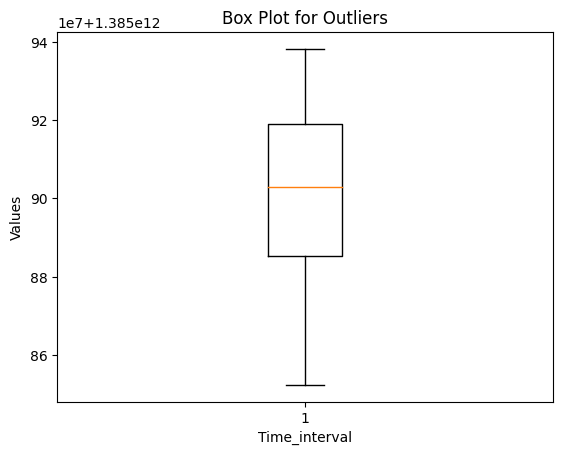

In [10]:
plt.boxplot(df['Time_interval'])
plt.xlabel('Time_interval')
plt.ylabel('Values')
plt.title('Box Plot for Outliers')
plt.show()